# 1. Install and Import Dependencies

In [1]:
# install yolov5
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 21 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.60 MiB | 1.99 MiB/s, done.
Resolving deltas: 100% (10988/10988), done.


In [1]:
!pip3 install -r ./yolov5/requirements.txt

     |████████████████████████████████| 194kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 7.4MB 5.5MB/s eta 0:00:01     |██▎                             | 522kB 5.5MB/s eta 0:00:02
     |████████████████████████████████| 19.8MB 17.1MB/s eta 0:00:01
     |████████████████████████████████| 54.7MB 4.9MB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/22/b5/692c5686550b05d540ce24b1532787dc497ffb968180b9f1b4185c795447/Pillow-10.1.0-cp38-cp38-macosx_10_10_x86_64.whl
     |████████████████████████████████| 35.0MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 146.7MB 108kB/s  eta 0:00:01   |████████▊                       | 39.9MB 1.4MB/s eta 0:01:17     |█████████████▉                  | 63.2MB 1.7MB/s eta 0:00:51    | 81.1MB 9.3MB/s eta 0:00:08     |█████████████████████           | 96.4MB 19.5MB/s eta 0:00:03     |██████████████████████▉         | 104.6MB 11.5MB/s eta 0:00:04
     |████████████████████████████████| 1.7MB 7.7MB/s eta 0:00:0

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2. Load Model

In [3]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /Users/huangweixiang/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-20 Python-3.8.3 torch-2.1.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections

In [5]:
img = "https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/16:9/w_1280,c_limit/highway-traffic.jpg"

In [6]:
result = model(img)
print(result)

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 1073.7ms pre-process, 336.2ms inference, 4.6ms NMS per image at shape (1, 3, 480, 640)


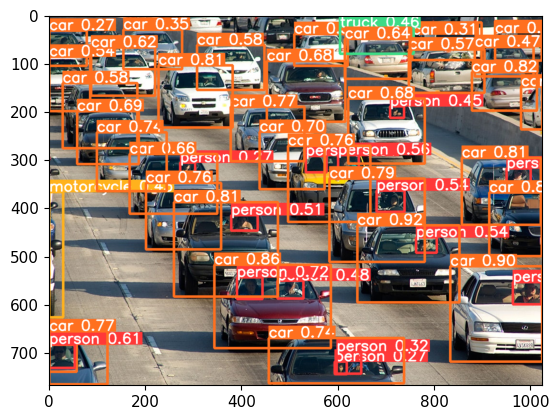

In [7]:
%matplotlib inline

plt.imshow(np.squeeze(result.render()))
plt.show()

# 4. Real Time Detections

In [7]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot Open Camera...")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Cannot Receieve Frame...")
        break
    # make detections
    result = model(frame)
    cv2.imshow("YOLO", np.squeeze(result.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 5. Train from Scratch

In [8]:
# collect awake and drowsy images from camera
import uuid # unique identifier to name the images
import os 
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'images') # data/images
labels = ['awake', 'drowsy']
number_img = 20

In [10]:
cap = cv2.VideoCapture(0)

# 確認camera正常
if not cap.isOpened():
    print("Cannot Open Camera...")
    exit()

for label in labels:
    print(f'Collect images for {label}')
    time.sleep(5)

    for num in range(number_img):
        print(f'Collect images for {label}, image number {num}')
        # 取得影像
        ret, frame = cap.read()
        # 建立image path 
        
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # 儲存影像
        cv2.imwrite(image_name, frame)

        cv2.imshow('Image Collection', frame)

        # 2 seconds delay between capture
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Collect images for awake
Collect images for awake, image number 0
Collect images for awake, image number 1
Collect images for awake, image number 2
Collect images for awake, image number 3
Collect images for awake, image number 4
Collect images for awake, image number 5
Collect images for awake, image number 6
Collect images for awake, image number 7
Collect images for awake, image number 8
Collect images for awake, image number 9
Collect images for awake, image number 10
Collect images for awake, image number 11
Collect images for awake, image number 12
Collect images for awake, image number 13
Collect images for awake, image number 14
Collect images for awake, image number 15
Collect images for awake, image number 16
Collect images for awake, image number 17
Collect images for awake, image number 18
Collect images for awake, image number 19
Collect images for drowsy
Collect images for drowsy, image number 0
Collect images for drowsy, image number 1
Collect images for drowsy, image nu

In [19]:
# 確認是否能正常生成image_name
for label in labels:
    print(f'Collect imgage for {label}')
    for num in range(number_img):
        print(f'Collect images for {label}, image number {num}')
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(image_name)

Collect imgage for awake
Collect images for awake, image number 0
data/images/awake.70804c74-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 1
data/images/awake.70804df0-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 2
data/images/awake.70804eb8-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 3
data/images/awake.70804f62-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 4
data/images/awake.70805002-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 5
data/images/awake.7080508e-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 6
data/images/awake.70805124-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 7
data/images/awake.708051b0-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 8
data/images/awake.7080523c-6f58-11ee-89a3-c4b301bfc059.jpg
Collect images for awake, image number 9
data/images/awake.708052d2-6f58-11

In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epoch 500 --data dataset.yaml --weights yolov5s.pt

2422.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to '/Users/huangweixiang/Documents/Chris/物件偵測/drowsiness': No such file or directory
YOLOv5 🚀 2023-10-20 Python-3.8.3 torch-2.1.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0

# 6. Load Model

In [2]:
model = torch.hub.load("ultralytics/yolov5", 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/huangweixiang/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-23 Python-3.8.3 torch-2.1.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
import os
img = os.path.join('data', 'images', 'awake.8f423c6a-6f5a-11ee-8139-c4b301bfc059.jpg')

In [4]:
result = model(img)
result.print()

image 1/1: 720x1280 1 awake
Speed: 110.1ms pre-process, 324.9ms inference, 12.6ms NMS per image at shape (1, 3, 384, 640)


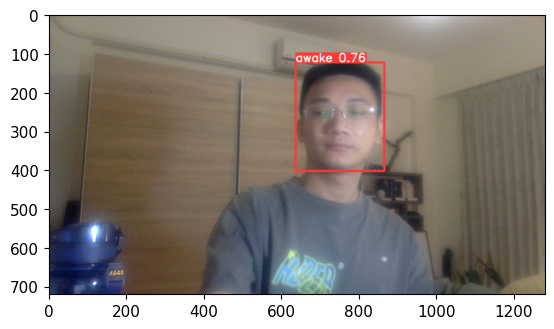

In [5]:
%matplotlib inline

plt.imshow(np.squeeze(result.render()))
plt.show()

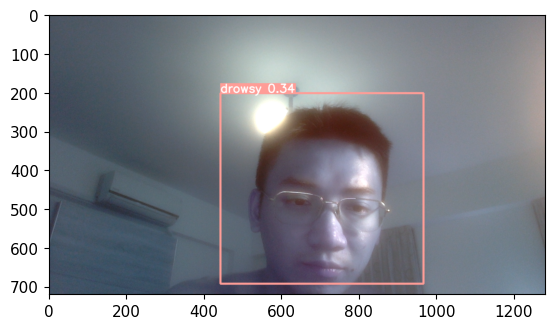

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    result = model(frame)

    cv2.imshow(np.squeeze(result.render()))

    if cv2.waitKey() & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()